In [1]:
import math
import random
import csv
from collections import Counter
import sys
import getopt
import numpy as np
from tqdm import tqdm, trange
from copy import deepcopy

import torch

from scipy import stats

import matplotlib.pyplot as plt

from subsample import subsample, subsample_binary
from data_loading import *

from ssnmf import SSNMF

In [2]:
def to_one_hot(y):

    y_hot = np.zeros((y.size, y.max()+1))
    y_hot[np.arange(y.size),y] = 1

    return y_hot.T

def run_ssnmf(X, y, r=4, lam=0):

    y_hot = to_one_hot(y)
    X = X

    X_normed = (X / np.linalg.norm(X, axis=0)).T

    model = SSNMF(X_normed,r, Y=y_hot, modelNum=3, lam=0)

    model.mult(num_iters=400)

    A = model.A
    S = model.S

    #for i in range(A.shape[1]):

    #    print(np.argsort(A[:,i])[-10:])
    
    return model

In [13]:
X, y = get_data(subsamp=True, binary=True)

In [14]:
#X = X / np.linalg.norm(X, axis=0)
X = X / np.max(X,axis=0)

In [20]:
model = run_ssnmf(X, y, r=3, lam=5)

In [21]:
A = model.A
S = model.S
B = model.B

print(A.shape)
print(S.shape)

(215, 3)
(3, 1638)


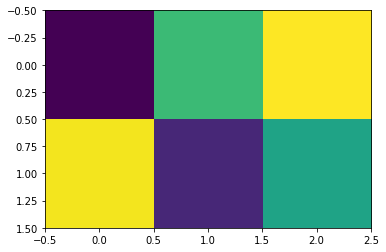

In [22]:
plt.imshow(B)

In [28]:
for i in range(A.shape[1]):
    ar = np.argsort(A[:,i])[::-1][:10]
    [print(str(x) + ",", end="") for x in ar]
    print()
    #print(A[:,i][np.argsort(A[:,i])[::-1][:10]])

85,92,97,89,90,93,87,115,103,106,
210,45,16,8,180,205,23,29,199,47,
74,75,73,52,71,70,76,77,72,69,


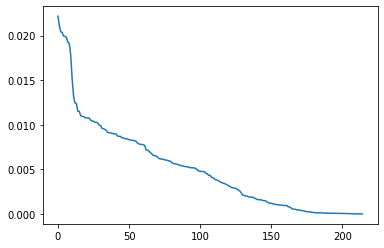

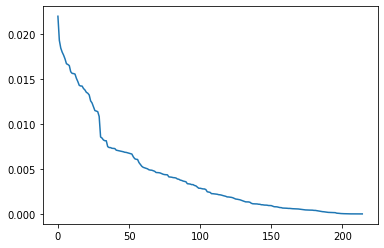

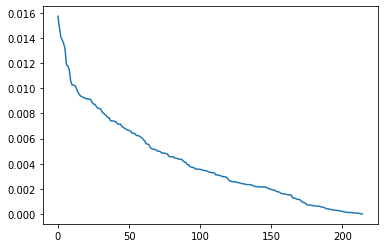

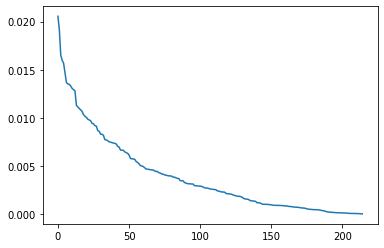

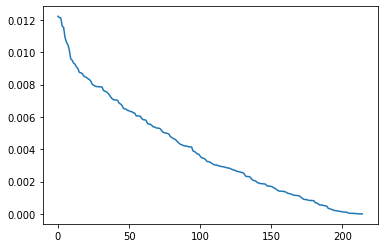

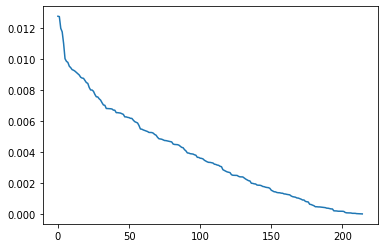

In [19]:
for i in range(A.shape[1]):
    plt.plot(A[:,i][np.argsort(A[:,i])[::-1]])
    plt.show()

In [ ]:
plt.imshow(A, aspect='auto')

In [ ]:
for i in range(A.shape[1]):
    print(np.argsort(A[:,i]))